In [1]:
import numpy as np
from skimage import io, filters
from scipy.ndimage import convolve
from skimage.filters import gaussian
import matplotlib.pyplot as plt

In [2]:
def showim(im_array, figsize=(4, 4), show_hist=False, nbins=None, bin_width=None, cmap='gray', vmin=None, vmax=None, titles=None):
    
    if isinstance(im_array, (list, tuple)):
        n_images = len(im_array)
        fig_width, fig_height = figsize
        plt.figure(figsize=(fig_width * n_images, fig_height))
        
        for idx, img in enumerate(im_array):
            plt.subplot(1, n_images, idx + 1)
            plt.imshow(img, cmap=cmap, vmin=vmin, vmax=vmax)
            
            if titles and isinstance(titles, (list, tuple)) and len(titles) == n_images:
                plt.title(titles[idx])
            elif titles and isinstance(titles, str):
                plt.title(titles)
            
            plt.axis('off')
        plt.tight_layout()
        
        plt.show()
    else:
        plt.figure(figsize=figsize)
        
        if show_hist:
            plt.subplot(1, 2, 1)
            plt.imshow(im_array, cmap=cmap, vmin=vmin, vmax=vmax)
            
            if titles and isinstance(titles, str):
                plt.title(titles)
            
            plt.axis('off')
            plt.subplot(1, 2, 2)
            
            im_flattened = im_array.ravel()
            min_val = np.floor(im_flattened.min())
            max_val = np.ceil(im_flattened.max())
            
            if bin_width is not None:
                bins = np.arange(min_val, max_val + bin_width, bin_width)
            elif nbins is not None:
                bins = nbins
            else:
                bins = int(max_val - min_val)
            
            plt.hist(im_flattened, bins=bins, color='black')
            plt.xlabel('Intensity Value')
            plt.ylabel('Frequency')
            plt.title('Image Intensity Histogram')
        
        else:
            plt.imshow(im_array, cmap=cmap, vmin=vmin, vmax=vmax)
            
            if titles and isinstance(titles, str):
                plt.title(titles)
            
            plt.axis('off')
        plt.tight_layout()
        plt.show()


def thresh_otsu(im_array, show_results = False):

    if show_results:
        
        plt.figure(figsize=(15,7))

        otsu_thresh = filters.threshold_otsu(im_array)
        image_otsu_thresh = (im_array > otsu_thresh).astype(np.uint8)
        plt.subplot(1,2,1)
        plt.imshow(image_otsu_thresh, cmap='gray')
        plt.axis('off')

        im_array_flattened = im_array.ravel()

        plt.subplot(1,2,2)
        plt.hist(im_array_flattened, bins=256, color='black')
        plt.axvline(otsu_thresh, color='red', linestyle='dashed', linewidth=2)
        plt.title('Image Intensity Histogram')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

    else:
        otsu_thresh = filters.threshold_otsu(im_array)
        image_otsu_thresh = (im_array > otsu_thresh).astype(np.uint8)

    return image_otsu_thresh


def surfplot(imarr, figsize = (11,7), cmap = 'viridis', show = True):

    x = np.arange(imarr.shape[1])
    y = np.arange(imarr.shape[0])
    X , Y = np.meshgrid(x, y)

    if show == True:

        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, imarr, cmap=cmap)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Pixel Intensity')
        plt.show();


    return X , Y;


**1)   Frequency  modulation**  


Download  “Buster_Keaton_General_Train_512.png”  from 
Canvas,  a  still  from  Buster Keaton’s wonderful film “The General” (1926), which you all should 
watch,  especially  since  it  was  filmed  in  Oregon!  I’m  sure  it’s  on  Kanopy.  Also  download 
“Buster_Keaton_General_Train_512_sineMod.png”, which is the same image multiplied by a sine 
wave (sin(2.0 π x / Px), with period Px = 8 pixels, scaled to [0, 255]). Fourier Transform each image 
and show the amplitude arrays. Take the log of the amplitude so that we can see its range easily. You 
can copy the Fourier Transform code I provided for last week’s homework. Look carefully and 
describe what’s different between the two Fourier Transforms. Explain why they look like they do; 
this doesn’t have to be a mathematical proof, but it should be convincing and plausible.

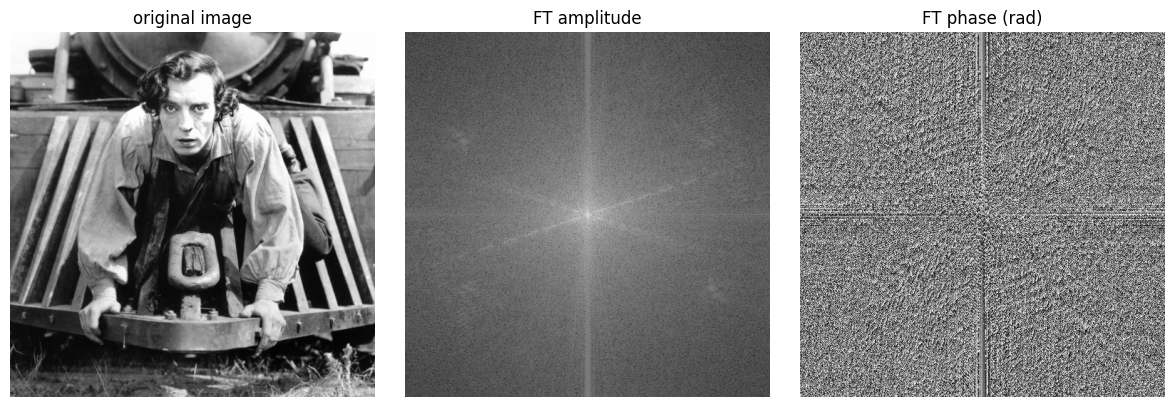

In [276]:
buster = io.imread('/home/apd/Projects/ImageAnalysis/HW4/Buster_Keaton_General_Train_512.png')
buster_fft = np.fft.fft2(buster)

F_shifted = np.fft.fftshift(buster_fft) 
amplitude = np.abs(F_shifted)
phase = np.angle(F_shifted)

showim((buster, np.log(amplitude), phase), titles = ('original image', 'FT amplitude', 'FT phase (rad)'))


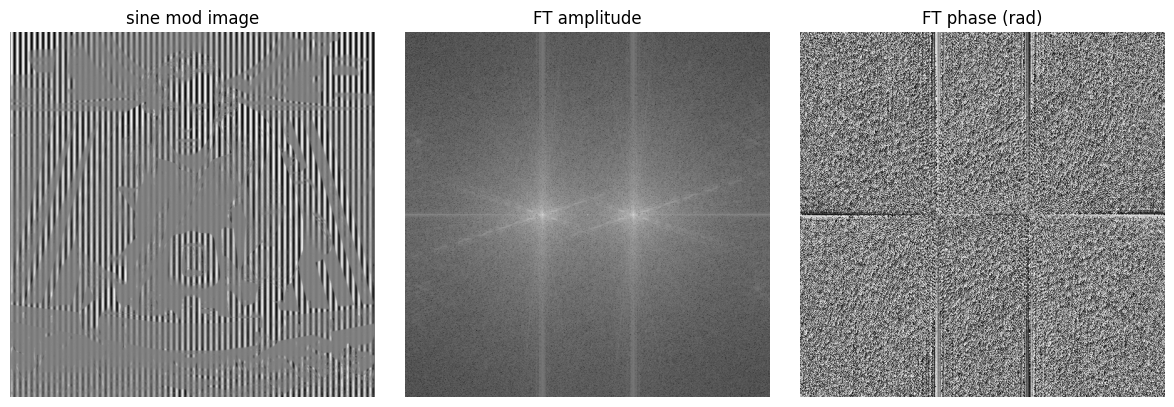

In [272]:
buster = io.imread('/home/apd/Projects/ImageAnalysis/HW4/Buster_Keaton_General_Train_512_sineMod.png')
buster_fft = np.fft.fft2(buster)

F_shifted = np.fft.fftshift(buster_fft) 
amplitude = np.abs(F_shifted)
phase = np.angle(F_shifted)

showim((buster, np.log(amplitude), phase), titles = ('sine mod image', 'FT amplitude', 'FT phase (rad)'), figsize=(4,4))


The amplitude array of the original image reveals a central frequency peak. After applying the sine modification, the frequency distribution changes which introduces two distinct peaks (that likely correspond to the positive and negative values of the sine wave). The modification results in a reduction of intensity at the central peak, as most of the original content is affected by the sine modulation. However, traces of the central peak are still slightly visible, even though much of the image information is redistributed.

**2) Quantized aggregates.** 

Download “emitters_33px_100ph.png,” a simulated image of 100 
point-sources arranged on a grid. Each emitter is located at a multiple of (33, 33) pixels from the top 
left. Imagine that these are images of single molecules, a protein linked to green fluorescent protein 
for example. You want to know: do these proteins exist as monomers (one unit), dimers (two units), 
trimers  (three  units),  ...,  or  a  combination  of  these?  In  other  words,  is  the  brightness  of  the  dots 
quantized, and if so, how many quanta are there per dot? Is this the same for all of them? Your task 
is to figure this out from the image

**(a)** Clearly explain each step of your assessment in addition to stating the answer. (Pasting code 
without explanations will get zero points.) Except for the placement on a grid, this is a very 
“real-world” problem – in fact, it was inspired by a graduate student talk I attended! 

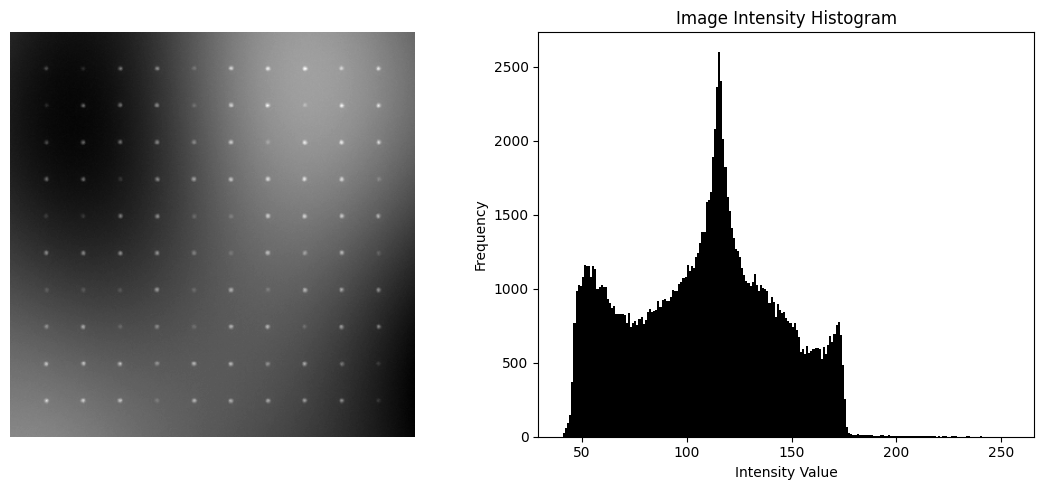

In [5]:
emitters = io.imread('/home/apd/Projects/ImageAnalysis/HW4/emitters_33px_100ph.png')
showim(emitters, show_hist = True)

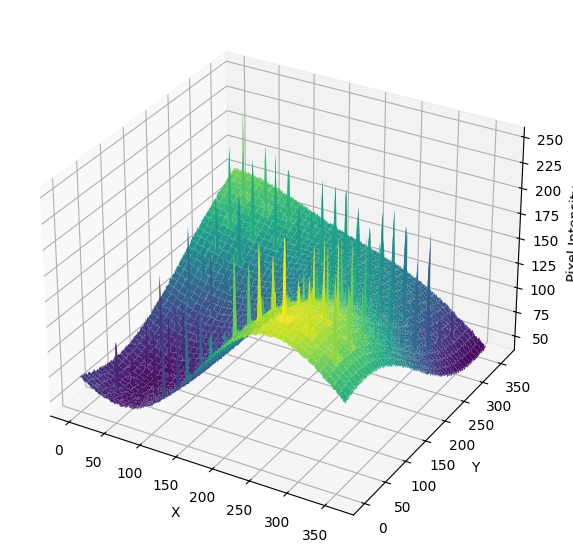

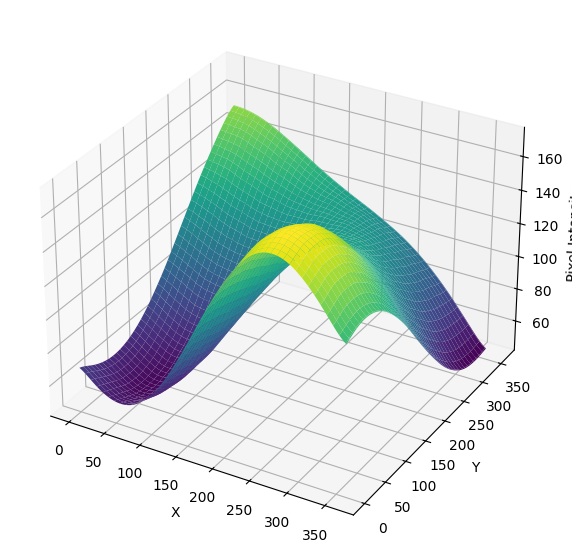

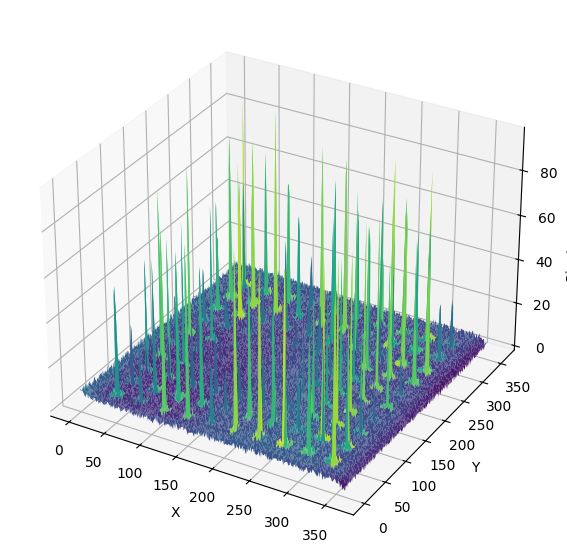

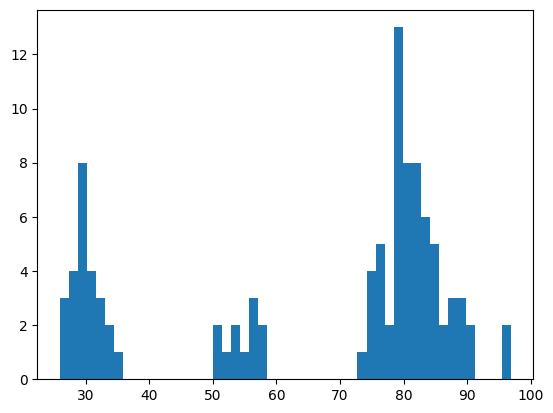

In [153]:
def extract_point_sources_max(image, grid_size=10, step=33, margin=33, neighborhood_size=3):

    height, width = image.shape

    half_size = neighborhood_size // 2

    indices = np.arange(grid_size)
    x_coords = margin + indices * step
    y_coords = margin + indices * step

    X, Y = np.meshgrid(x_coords, y_coords)

    x_flat = X.flatten().astype(int)
    y_flat = Y.flatten().astype(int)

    valid_mask = (
        (x_flat - half_size >= 0) &
        (x_flat + half_size < width) &
        (y_flat - half_size >= 0) &
        (y_flat + half_size < height)
    )

    x_flat = x_flat[valid_mask]
    y_flat = y_flat[valid_mask]

    max_values = np.empty_like(x_flat, dtype=image.dtype)

    for i, (y, x) in enumerate(zip(y_flat, x_flat)):
        window = image[y - half_size : y + half_size + 1, x - half_size : x + half_size + 1]
        max_values[i] = window.max()

    coordinates = np.vstack((y_flat, x_flat)).T 

    return max_values, coordinates


A = emitters  
surfplot(A)
B = (gaussian(A, sigma=11)*255)
surfplot(B)
C = A - B
C = C - C.min()
surfplot(C)

signals, mask = extract_point_sources_max(C)

bin_width = 1
min_val = np.min(signals)
max_val = np.max(signals)
bins = np.arange(min_val, max_val + bin_width, bin_width)
plt.hist(signals, bins=50);

In [154]:
monomers = 0
dimers = 0
trimers = 0

for signal in signals:
    if signal > 0 and signal < 40:
        monomers += 1
    elif signal > 45 and signal < 65:
        dimers += 1
    elif signal > 65:
        trimers += 1
print(f"number of monomers: {monomers}")
print(f"number of dimers: {dimers}")
print(f"number of trimers: {trimers}")

number of monomers: 25
number of dimers: 11
number of trimers: 64


Since the signals are spikes on a wave-like, slow-changing background, I decided to convolve the image with a gaussian convolution to get rid of the spikes, leaving essentially only the background. Then, I picked out the max value of the neighborhood of each signal in the emitter array (each 33 pixels apart) to get the representative signal. After this, I histogrammed the values, displaying three distinct intensity levels from ~25 5o ~35, ~50 to ~60, and ~70 to ~90 (with one extra around 97). From these distinct conncentrations I pulled out the amount of each, with a total of 25 monomers, 11 dimers and 64 trimers. The brightness of the dots seems quantized within these three clusters, indicating the proteins exist either as amonomer, dimer, or trimer.

**3) Make a PSF**

Write  a  function  that  calculates  the  point  spread  function, 
outputting  it  as  an  N  x  N  array  as  a  function  of  input  parameters:  N,  the  wavelength  of  light,  the 
numerical aperture, and the pixel scale (i.e. the distance in the focal plane that each pixel 
corresponds to.)

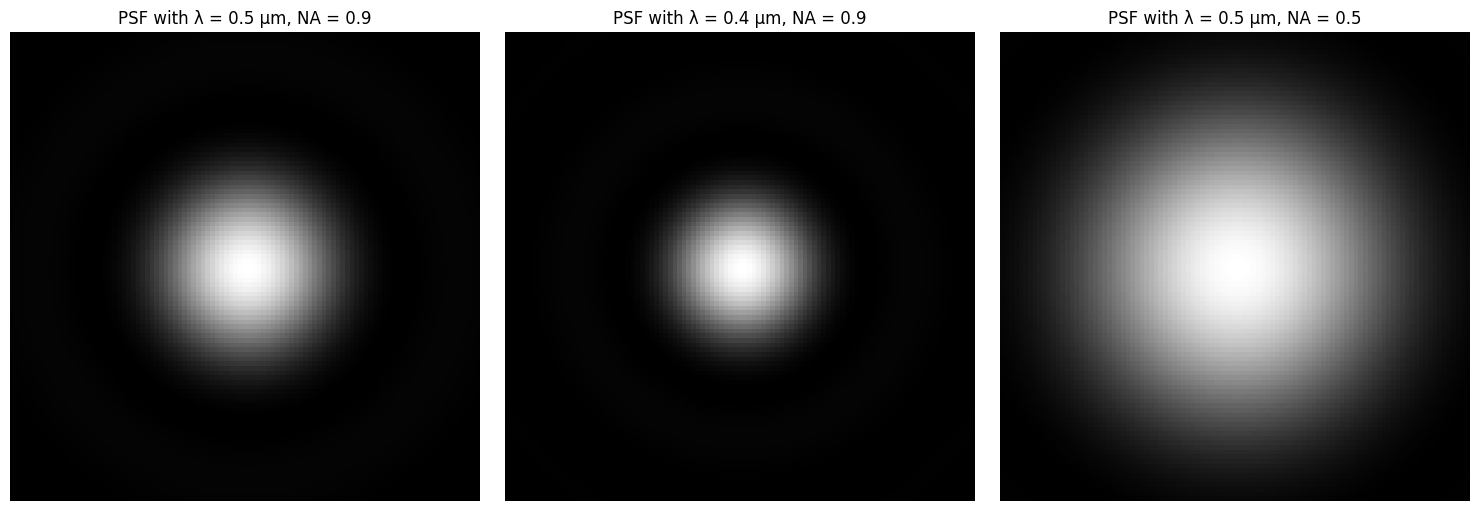

In [261]:
from scipy.special import j1

def psf(N, wavelength, NA, pixel_scale):

    x = np.linspace(-N//2, N//2, N) * pixel_scale
    y = np.linspace(-N//2, N//2, N) * pixel_scale
    X, Y = np.meshgrid(x, y)
    r = np.sqrt(X**2 + Y**2) 

    v = (2 * np.pi / wavelength) * NA * r

    PSF = np.zeros_like(v)
    PSF[v == 0] = 1  
    PSF[v != 0] = 4 * (j1(v[v != 0]) / v[v != 0])**2  

    PSF = PSF / PSF.sum()
    return PSF

N = 101
wavelengths = [0.5, 0.4, 0.5]  
NA_values = [0.9, 0.9, 0.5]    
pixel_scale = 1 / N             

imgs = []
titles = []

for i, (wavelength, NA) in enumerate(zip(wavelengths, NA_values)):
    PSF = psf(N, wavelength, NA, pixel_scale)
    title = f"PSF with λ = {wavelength} μm, NA = {NA}"
    imgs.append(PSF)
    titles.append(title)

showim(imgs, titles=titles, figsize=(5,5))




4. A worse worm image!

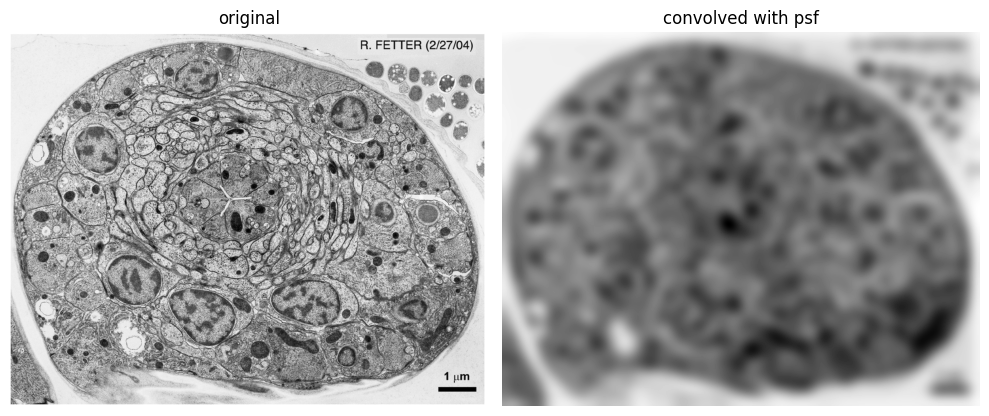

In [250]:
worm = io.imread('/home/apd/Projects/ImageAnalysis/HW4/fetter_Celegans_cellfig10.jpg')

lam = 0.53
NA = 0.7
N = 101
pixel_scale = (1/111)

PSF = psf(N, lam, NA, pixel_scale)
worse_worm = convolve(worm, PSF)

showim((worm, worse_worm), figsize = (5,5), titles = ('original','convolved with psf'))

I opened the image in ImageJ and measured the scalebar in pixels, getting around 111 pixels. Thus I set the pixel_scale to 1/111, and set the other parameters as mentioned in the description of the problem. It seemed to just blur the original image, which we expect since TEM's can acheive much higher resolution.

**5 SNR and Poisson Noise**

For a Poisson-distributed random variable like the total number 
of photons (Nphoton), how are Nphoton and the signal-to-noise ratio (SNR) related? Remember: “noise” 
is the standard deviation of whatever we’re measuring. Yes, this is a very short question. 

The signal to noise ratio is related to the number of photons (if it is a posson-distributed random variable) by square root, or in other words SNR ~ sqrt(N_photons), since the noise is just the square root of the mean, which in this case is just N_photons

**6: My gameplan**

To tackle this problem, the first thing I need to do is adjust the scale of the PSF function I used earlier. Before, I was working with a fine scale of 0.01 μm/px, but now I have to account for a larger scale of 0.1 μm/px to match a typical camera resolution. The idea here is to essentially create a “nested” grid, where each camera pixel represents a larger block of fine-grid pixels. For instance, with the 0.1 μm/px camera scale, each camera pixel will correspond to 10x10 fine-grid pixels. I’m thinking I’ll need to sum or average the intensity values from these smaller grid points into each camera pixel, kind of like a downscaling process. Once that’s done, it will effectively pixelate the image to match the lower resolution a camera would capture.

After that, I’ll need to scale the PSF output to match a specific photon count, N_photon. The PSF gives me the probability of photons arriving at different points, but since photon arrival is random, the actual number of photons at each pixel should follow a Poisson distribution. So, I’ll modify the function to generate Poisson-distributed photon counts at each pixel, using the scaled PSF values as the mean. This part should be pretty straightforward and will just require adding one line of code to introduce the Poisson noise. Once that’s in place, I’ll be able to run the function with two examples for N_photon = 50 and two more for N_photon = 500. The final function will take in the necessary inputs like N_photon, lambda, NA, the camera scale, and the fine grid scale, and it will output the pixelated image with noise.

**6) Simulated Point Sources, Part 1**

**(a)** Pixelation

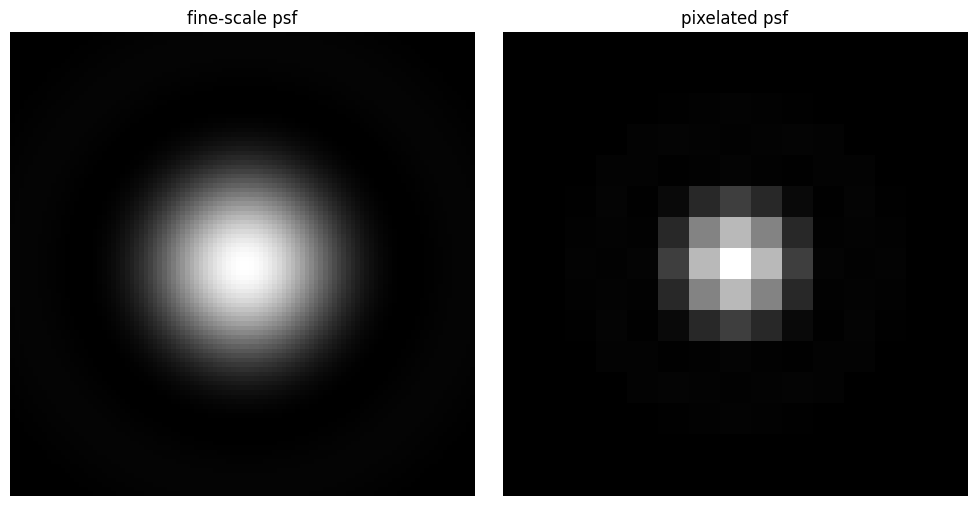

In [264]:
def pixelated_psf(N_camera, wavelength, NA, camera_scale, fine_scale):
    block_size = int(camera_scale / fine_scale)
    fine_grid_N = N_camera * block_size 
    
    x = np.linspace(-fine_grid_N//2, fine_grid_N//2, fine_grid_N) * fine_scale
    y = np.linspace(-fine_grid_N//2, fine_grid_N//2, fine_grid_N) * fine_scale
    X, Y = np.meshgrid(x, y)
    r = np.sqrt(X**2 + Y**2)

    v = (2 * np.pi / wavelength) * NA * r
    
    psf_fine = np.zeros_like(v)
    psf_fine[v == 0] = 1  
    psf_fine[v != 0] = 4 * (j1(v[v != 0]) / v[v != 0])**2  
    
    psf_fine = psf_fine / psf_fine.sum()
    
    psf_camera = np.zeros((N_camera, N_camera))

    for i in range(N_camera):
        for j in range(N_camera):
            block = psf_fine[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
            psf_camera[i, j] = np.sum(block)
    
    psf_camera /= np.sum(psf_camera)
    
    return psf_camera

N_camera = 15         
wavelength = 0.5      
NA = 0.9              
camera_scale = 0.1   
fine_scale = 0.01    

psf_fine = psf(N, lam, NA, pixel_scale)
psf_pixelated = pixelated_psf(N_camera, wavelength, NA, camera_scale, fine_scale)
showim((psf_fine, psf_pixelated), figsize=(5,5), titles=('fine-scale psf','pixelated psf'))

**(b)** Noise

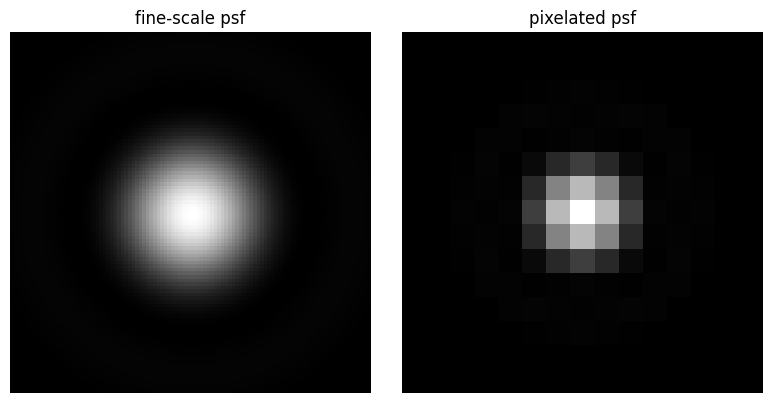

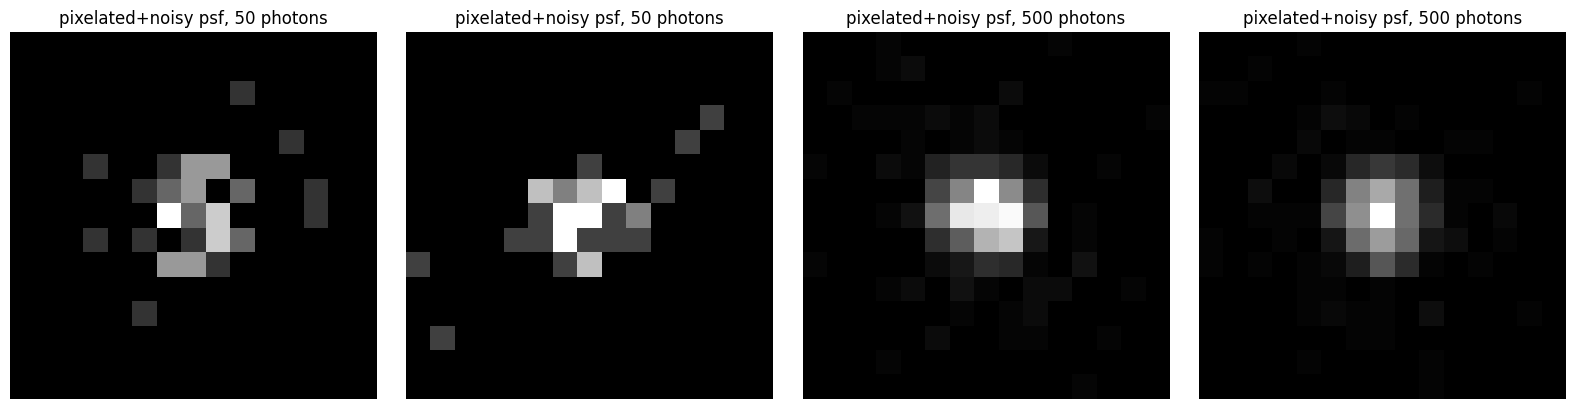

In [269]:
def pixelated_psf_with_noise(N_camera, wavelength, NA, camera_scale, fine_scale, N_photon):
    block_size = int(camera_scale / fine_scale)
    fine_grid_N = N_camera * block_size 
    
    x = np.linspace(-fine_grid_N//2, fine_grid_N//2, fine_grid_N) * fine_scale
    y = np.linspace(-fine_grid_N//2, fine_grid_N//2, fine_grid_N) * fine_scale
    X, Y = np.meshgrid(x, y)
    r = np.sqrt(X**2 + Y**2)
    
    v = (2 * np.pi / wavelength) * NA * r
    
    psf_fine = np.zeros_like(v)
    psf_fine[v == 0] = 1  
    psf_fine[v != 0] = 4 * (j1(v[v != 0]) / v[v != 0])**2 
 
    psf_fine = psf_fine / psf_fine.sum()
    
    psf_camera = np.zeros((N_camera, N_camera))

    for i in range(N_camera):
        for j in range(N_camera):
            block = psf_fine[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
            psf_camera[i, j] = np.sum(block)
    
    psf_camera /= np.sum(psf_camera)
    
    psf_camera *= N_photon
    
    noisy_psf = np.random.poisson(psf_camera)
    
    return noisy_psf

N_camera = 15        
wavelength = 0.5      
NA = 0.9              
camera_scale = 0.1    
fine_scale = 0.01     

psf_fine = psf(N=101, wavelength=wavelength, NA=NA, pixel_scale = fine_scale)
psf_pixelated = pixelated_psf(N_camera=N_camera, wavelength=wavelength, NA=NA, camera_scale=camera_scale, fine_scale=fine_scale)

psf_noisy_50_1 = pixelated_psf_with_noise(N_camera, wavelength, NA, camera_scale, fine_scale, N_photon = 50)
psf_noisy_50_2 = pixelated_psf_with_noise(N_camera, wavelength, NA, camera_scale, fine_scale, N_photon = 50)

psf_noisy_500_1 = pixelated_psf_with_noise(N_camera, wavelength, NA, camera_scale, fine_scale, N_photon = 500)
psf_noisy_500_2 = pixelated_psf_with_noise(N_camera, wavelength, NA, camera_scale, fine_scale, N_photon = 500)

titles = ('fine-scale psf', 'pixelated psf')
showim((psf_fine, psf_pixelated), figsize=(4,4), titles=titles)

showim((psf_noisy_50_1, psf_noisy_50_2, psf_noisy_500_1, psf_noisy_500_2), 
       titles = ('pixelated+noisy psf, 50 photons','pixelated+noisy psf, 50 photons',
                 'pixelated+noisy psf, 500 photons','pixelated+noisy psf, 500 photons'),
                 figsize = (4,4))


**7) Simulated Point Sources, Part 2**: Add in an offset/make the psf uncentered

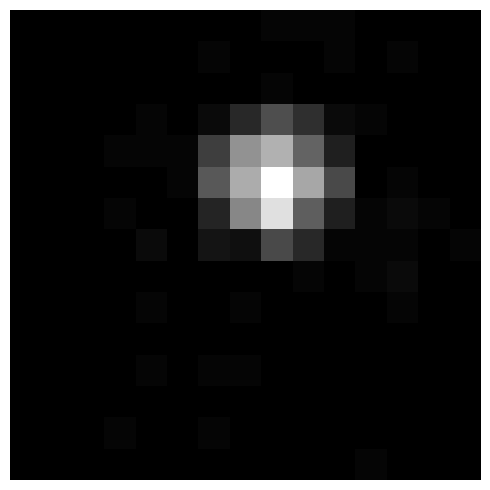

In [233]:
def pixelated_psf_with_offset(N_camera, wavelength, NA, camera_scale, fine_scale, N_photon, offset):
    block_size = int(camera_scale / fine_scale)
    fine_grid_N = N_camera * block_size
    
    x = np.linspace(-fine_grid_N//2, fine_grid_N//2, fine_grid_N) * fine_scale
    y = np.linspace(-fine_grid_N//2, fine_grid_N//2, fine_grid_N) * fine_scale
    X, Y = np.meshgrid(x, y)
    
    xc, yc = offset

    r = np.sqrt((X - xc)**2 + (Y - yc)**2)
    
    v = (2 * np.pi / wavelength) * NA * r
    
    psf_fine = np.zeros_like(v)
    psf_fine[v == 0] = 1
    psf_fine[v != 0] = 4 * (j1(v[v != 0]) / v[v != 0])**2
    
    psf_fine = psf_fine / psf_fine.sum()
    
    psf_camera = np.zeros((N_camera, N_camera))

    for i in range(N_camera):
        for j in range(N_camera):
            block = psf_fine[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
            psf_camera[i, j] = np.sum(block)
    
    psf_camera /= np.sum(psf_camera)
    
    psf_camera *= N_photon
    
    noisy_psf = np.random.poisson(psf_camera)
    
    return noisy_psf

N_camera = 15
wavelength = 0.5
NA = 0.9
camera_scale = 0.1
fine_scale = 0.01
N_photon = 500
offset = (0.1, -0.2)


psf_with_offset = pixelated_psf_with_offset(N_camera, wavelength, NA, camera_scale, fine_scale, N_photon, offset)

showim(psf_with_offset)

The changes occur in the below lines, where the psf is now no longer centered at zero but at an unpacked coordinate tuple "offset"

xc, yc = offset

r = np.sqrt((X - xc) ** 2 + (Y - yc) ** 2)

**8) Simulated Point Sources Part 3**: Add in background

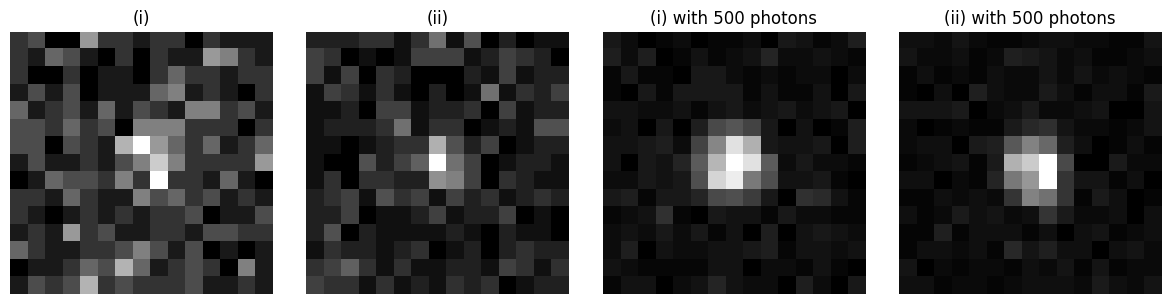

In [270]:
def sim_ps(N_camera, wavelength, NA, camera_scale, fine_scale, N_photon, offset, B):
    block_size = int(camera_scale / fine_scale)
    fine_grid_N = N_camera * block_size
    
    x = np.linspace(-fine_grid_N//2, fine_grid_N//2, fine_grid_N) * fine_scale
    y = np.linspace(-fine_grid_N//2, fine_grid_N//2, fine_grid_N) * fine_scale
    X, Y = np.meshgrid(x, y)
    
    xc, yc = offset

    r = np.sqrt((X - xc)**2 + (Y - yc)**2)
    
    v = (2 * np.pi / wavelength) * NA * r
    
    psf_fine = np.zeros_like(v)
    psf_fine[v == 0] = 1
    psf_fine[v != 0] = 4 * (j1(v[v != 0]) / v[v != 0])**2
    
    psf_fine = psf_fine / psf_fine.sum()
    
    psf_camera = np.zeros((N_camera, N_camera))

    for i in range(N_camera):
        for j in range(N_camera):
            block = psf_fine[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
            psf_camera[i, j] = np.sum(block)
    
    psf_camera /= np.sum(psf_camera)
    
    psf_camera *= N_photon
    
    noisy_psf = np.random.poisson(psf_camera)

    background = np.random.poisson(B, (N_camera, N_camera))

    final_image = noisy_psf + background

    
    return final_image


N_camera = 15
wavelength = 0.5
NA = 0.9
camera_scale = 0.1
fine_scale = 0.01
N_photons = 50
bg = 2

psf_with_background_1 = sim_ps(N_camera, wavelength, NA, camera_scale, fine_scale, N_photons, (0,0), bg)

psf_with_background_2 = sim_ps(N_camera, wavelength, NA, camera_scale, fine_scale, N_photons, (0.03,0.03), bg)


N_photons = 500
psf_with_background_3 = sim_ps(N_camera, wavelength, NA, camera_scale, fine_scale, N_photons, (0,0), bg)
psf_with_background_4 = sim_ps(N_camera, wavelength, NA, camera_scale, fine_scale, N_photons, (0.03,0.03), bg)

titles = ('(i)','(ii)','(i) with 500 photons', '(ii) with 500 photons')
showim((psf_with_background_1, psf_with_background_2, psf_with_background_3, psf_with_background_4), 
       figsize=(3,3), 
       titles=titles)



**9) Simulating a ring** 

Describe in words the steps involved in making a function to simulate 
the image of a ring. Comment on what steps are similar / different to the point source simulation. 
You don’t have to write this function!

To simulate the image of a ring, the process is similar to the point source simulation, with a few changes. Instead of a single point, I would define the intensity in the shape of a ring, where it's concentrated around a specific radial distance from the center. I would still calculate the radial distance for each pixel, but the intensity would now be highest around the ring's radius instead of the center. Poisson noise would be added just like before, where the pixel values represent photon counts, and background noise with a mean value, B, is applied to each pixel. I’d scale the total intensity to match N_photon. The main difference is that the intensity is spread around the ring, but the rest—scaling and noise—remains the same as in the point source case.